In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
oil = pd.read_csv('oil_sentiment.csv')
climate = pd.read_csv('climate_sentiment.csv')
emicom = pd.read_csv('emi_com.csv')
price = pd.read_csv('all_commodities.csv')

In [8]:
oil

,date,oil_sentence_count,text,word_count,Stemd_text,Sentiments
0,1982-06-09,3,stark gash border separates german people,15,stark gash border separ german peopl,-0.100
1,1982-06-09,3,economic energy vastly exceeds adversaries,9,econom energi vastli exce adversari,0.000
2,1982-06-09,3,soil germany every ally vital concern member a...,19,soil germani everi alli vital concern member a...,0.100
3,2022-03-01,13,tonight announce united states worked 30 count...,26,tonight announc unit state work 30 countri rel...,0.000
4,2022-03-01,13,tonight announce united states worked 30 count...,26,tonight announc unit state work 30 countri rel...,0.000
...,...,...,...,...,...,...
1684,1976-09-23,34,another issue campaign governor carter endorse...,24,anoth issu campaign governor carter endors dem...,0.000
1685,2002-06-01,1,advancing nation pursue economic reform unleas...,16,advanc nation pursu econom reform unleash grea...,0.800
1686,1997-01-20,2,turmoil triumph promise exploded onto world st...,18,turmoil triumph promis explod onto world stage...,0.000
1687,1997-01-20,2,fuel fanaticism terror,6,fuel fanatic terror,-0.300


In [9]:
oil_price = price[price['Commodity'] == 'Brent Crude Oil']
oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_1726/158445477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)


In [10]:
oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])
oil_price.set_index('Date_Time', inplace=True)
oil_price

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_1726/3093365293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])


,Value
Date_Time,
2024-01-22,81.70
2024-01-19,80.71
2024-01-18,81.04
2024-01-17,78.88
2024-01-16,80.15
...,...
1987-05-26,18.63
1987-05-25,18.60
1987-05-22,18.55


In [12]:
oil.drop(['text', 'Stemd_text'], axis=1, inplace=True)

In [14]:
climate.drop(['text', 'Stemd_text'], axis=1, inplace=True)

In [40]:
oil['sentiment_abs'] = oil['Sentiments'].abs()
climate['sentiment_abs'] = climate['Sentiments'].abs()

oil['max_sentiment'] = oil.groupby('date')['sentiment_abs'].transform('max')
climate['max_sentiment'] = climate.groupby('date')['sentiment_abs'].transform('max')

In [41]:
# for each date, take the average sentence count and word count, but for sentiment take the max value

oil_new = oil.groupby('date').mean()
climate_new = climate.groupby('date').mean()

In [42]:
oil_new.index = pd.to_datetime(oil_new.index)

climate_new.index = pd.to_datetime(climate_new.index)

In [43]:
oil_new_s = oil_new.resample('D').mean()
oil_new_s = oil_new_s.interpolate(method='time')
oil_new_s

,oil_sentence_count,word_count,Sentiments,max_sentiment,sentiment_abs
date,,,,,
1974-01-30,21.000000,35.047619,0.032619,0.312000,0.094429
1974-01-31,21.846154,35.366002,0.033557,0.326923,0.094511
1974-02-01,22.692308,35.684385,0.034495,0.341846,0.094594
1974-02-02,23.538462,36.002769,0.035432,0.356769,0.094677
1974-02-03,24.384615,36.321152,0.036370,0.371692,0.094760
...,...,...,...,...,...
2024-03-03,1.971223,126.582734,0.109809,0.150115,0.109809
2024-03-04,1.978417,126.187050,0.110482,0.151086,0.110482
2024-03-05,1.985612,125.791367,0.111155,0.152058,0.111155


In [44]:
climate_new_s = climate_new.resample('D').mean()
climate_new_s = climate_new_s.interpolate(method='time')

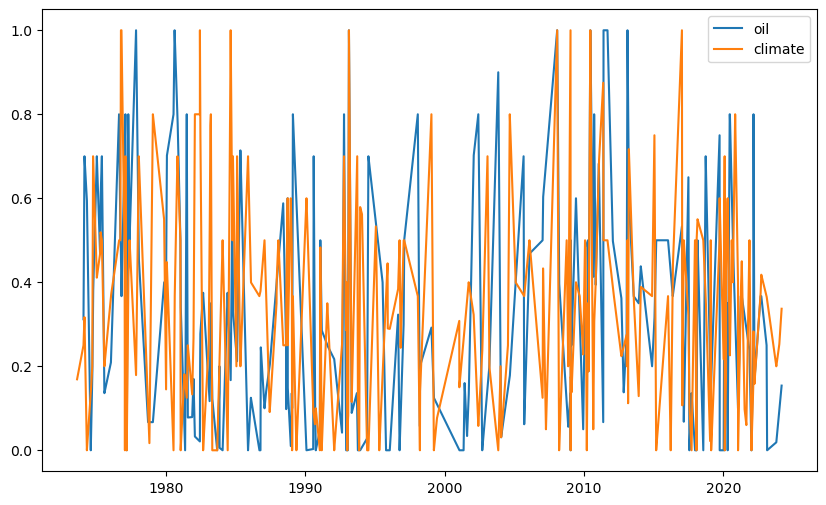

In [45]:
# plot the sentiments of oil and climate
plt.figure(figsize=(10, 6))
plt.plot(np.abs(oil_new_s['max_sentiment']), label='oil')
plt.plot(np.abs(climate_new_s['max_sentiment']), label='climate')
plt.legend()
plt.show()

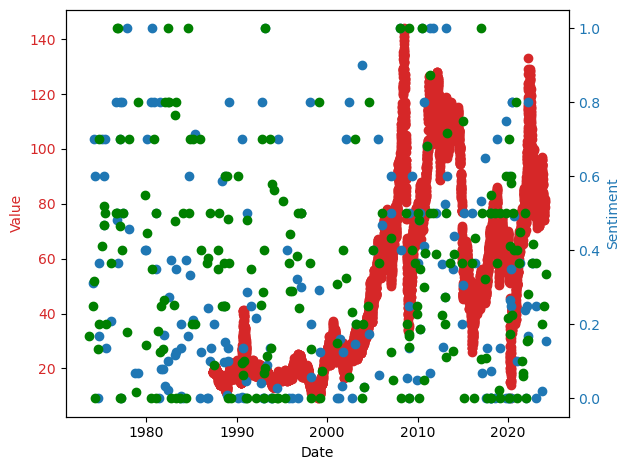

In [49]:
# plot oil prices with climate sentiment
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.scatter(oil_price.index, oil_price['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)
ax2.scatter(oil_new.index, oil_new['max_sentiment'], color=color)
ax2.scatter(climate_new.index, climate_new['max_sentiment'], color = 'green')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [7]:
# find correlation between oil prices and climate sentiment
oil_price_resample = oil_price.resample('D').mean()
climate_sum_resample = climate_sum.resample('D').mean()

# interpolate missing values
oil_price_resample = oil_price_resample.interpolate()
climate_sum_resample = climate_sum_resample.interpolate()

# cut climate sentiment to match oil prices
climate_sum_resample = climate_sum_resample[climate_sum_resample.index.isin(oil_price_resample.index)]

correlation = oil_price_resample['Value'].corr(climate_sum_resample['sentiment'])

In [50]:
oil_price_resample = oil_price.resample('D').mean()
oil_price_resample = oil_price_resample.interpolate()

In [52]:
# find correlation between oil price and oil sentiment
oil_new_s = oil_new_s[oil_new_s.index.isin(oil_price_resample.index)]
correlation_oil = oil_price_resample['Value'].corr(oil_new_s['max_sentiment'])

climate_new_s = climate_new_s[climate_new_s.index.isin(oil_price_resample.index)]
correlation_climate = oil_price_resample['Value'].corr(climate_new_s['max_sentiment'])

correlation_oil, correlation_climate

(0.22527840266843416, 0.16056058822817815)

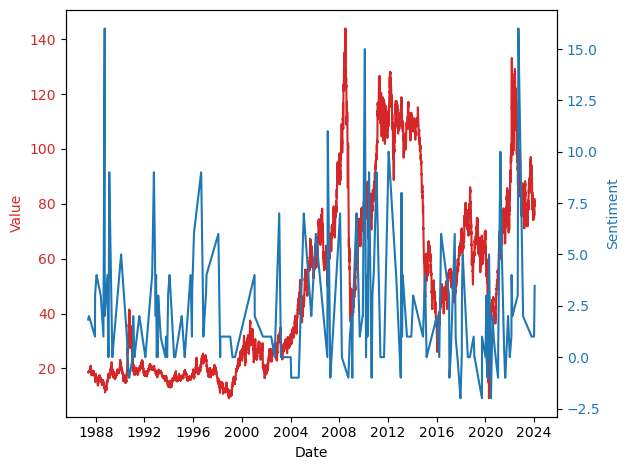

In [9]:
# plot oil prices with climate sentiment
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.plot(oil_price_resample.index, oil_price_resample['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)
ax2.plot(climate_sum_resample.index, climate_sum_resample['sentiment'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [53]:
from LinearModel import *

In [ ]:
oil_new_s

In [61]:
oil_new_s

,oil_sentence_count,word_count,Sentiments,max_sentiment,sentiment_abs
date,,,,,
1987-05-20,1.770000,22.550000,-0.045720,0.185280,0.108280
1987-05-21,1.780000,22.700000,-0.048080,0.185920,0.107920
1987-05-22,1.790000,22.850000,-0.050440,0.186560,0.107560
1987-05-23,1.800000,23.000000,-0.052800,0.187200,0.107200
1987-05-24,1.810000,23.150000,-0.055160,0.187840,0.106840
...,...,...,...,...,...
2024-01-18,1.647482,144.388489,0.079540,0.106410,0.079540
2024-01-19,1.654676,143.992806,0.080212,0.107381,0.080212
2024-01-20,1.661871,143.597122,0.080885,0.108353,0.080885


In [64]:
oil_price_resample_shifted

,Value
Date_Time,
1987-05-20,NaN
1987-05-21,18.630000
1987-05-22,18.450000
1987-05-23,18.550000
1987-05-24,18.566667
...,...
2024-01-18,78.880000
2024-01-19,81.040000
2024-01-20,80.710000


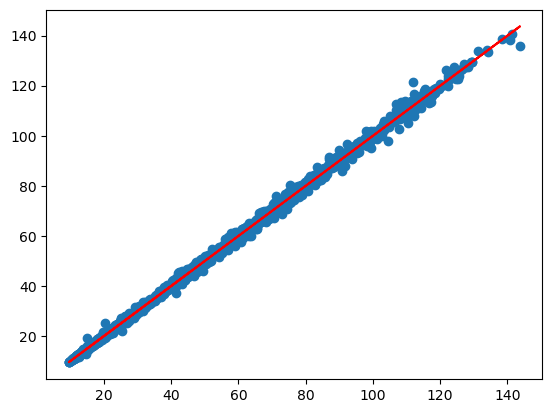

In [94]:
# create new dataframe with oil price shifted by 1 day
oil_price_resample_shifted = oil_price_resample.shift(-1)
oil_price_resample_shifted = oil_price_resample_shifted.interpolate()

# find correlation between the shifted oil price and oil price
correlation_shifted = oil_price_resample['Value'].corr(oil_price_resample_shifted['Value'])

# create model that predicts oil price based on previous day oil price
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = oil_price_resample_shifted['Value'].values.reshape(-1, 1)
y = oil_price_resample['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

# evaluate the model
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [100]:
oil_price_resample_shifted[0]

18.45

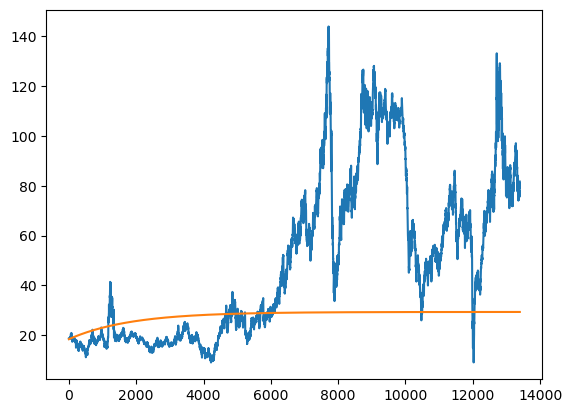

In [101]:
# feed the previous-day oil price one at a time to the model and predict the next day oil price
predictions = []
for i in range(len(oil_price_resample_shifted)):
    if i == 0:
        X = oil_price_resample_shifted[i].reshape(-1, 1)
        prediction = model.predict(X)
        predictions.append(prediction[0])
    else:
        X = np.array(predictions[-1]).reshape(-1, 1)
        prediction = model.predict(X)
        predictions.append(prediction[0])
    
predictions = np.array(predictions)

# plot the predictions
plt.plot(oil_price_resample)
plt.plot(predictions)
plt.show()

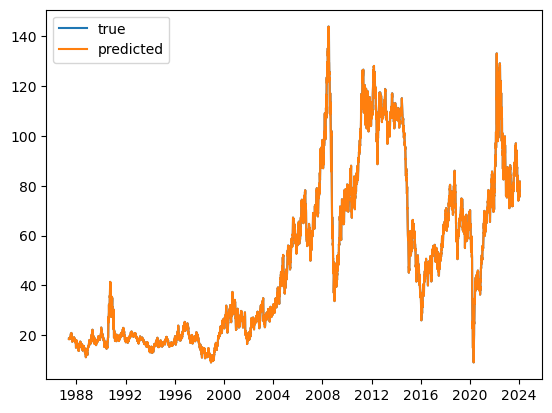

In [71]:
# apply the model to the whole dataset
y_pred = model.predict(X)

plt.plot(oil_price_resample.index, y, label='true')
plt.plot(oil_price_resample.index, y_pred, label='predicted')
plt.legend()

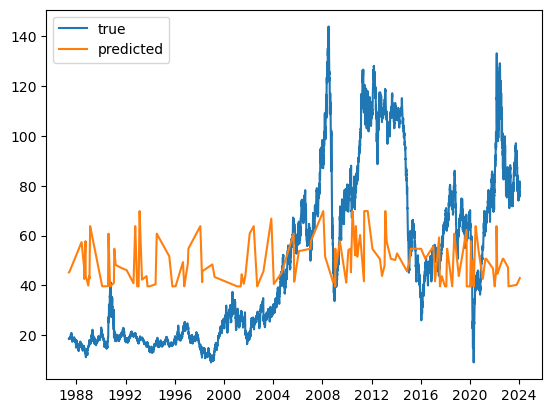

In [82]:
# join oil and climate data
oil_new_s.index = pd.to_datetime(oil_new_s.index)
climate_new_s.index = pd.to_datetime(climate_new_s.index)

joined = oil_new_s.join(climate_new_s, lsuffix='_oil', rsuffix='_climate')
joined = joined.interpolate()

joined

,oil_sentence_count,word_count_oil,Sentiments_oil,max_sentiment_oil,sentiment_abs_oil,climate_sentence_count,word_count_climate,Sentiments_climate,sentiment_abs_climate,max_sentiment_climate
date,,,,,,,,,,
1987-05-20,1.770000,22.550000,-0.045720,0.185280,0.108280,2.000000,33.731618,0.105426,0.105426,0.160169
1987-05-21,1.780000,22.700000,-0.048080,0.185920,0.107920,2.000000,33.786765,0.104147,0.104147,0.157162
1987-05-22,1.790000,22.850000,-0.050440,0.186560,0.107560,2.000000,33.841912,0.102868,0.102868,0.154154
1987-05-23,1.800000,23.000000,-0.052800,0.187200,0.107200,2.000000,33.897059,0.101588,0.101588,0.151147
1987-05-24,1.810000,23.150000,-0.055160,0.187840,0.106840,2.000000,33.952206,0.100309,0.100309,0.148140
...,...,...,...,...,...,...,...,...,...,...
2024-01-18,1.647482,144.388489,0.079540,0.106410,0.079540,3.887097,46.852639,0.120692,0.120692,0.268242
2024-01-19,1.654676,143.992806,0.080212,0.107381,0.080212,4.032258,47.879765,0.120361,0.120361,0.269645
2024-01-20,1.661871,143.597122,0.080885,0.108353,0.080885,4.177419,48.906891,0.120029,0.120029,0.271048


In [83]:
# join the joined data with previous day oil price and current day oil price
joined = joined.join(oil_price_resample, rsuffix='_price')
joined = joined.join(oil_price_resample_shifted, rsuffix='_price_shifted')
joined = joined.interpolate()

In [84]:
joined

,oil_sentence_count,word_count_oil,Sentiments_oil,max_sentiment_oil,sentiment_abs_oil,climate_sentence_count,word_count_climate,Sentiments_climate,sentiment_abs_climate,max_sentiment_climate,Value,Value_price_shifted
date,,,,,,,,,,,,
1987-05-20,1.770000,22.550000,-0.045720,0.185280,0.108280,2.000000,33.731618,0.105426,0.105426,0.160169,18.630000,18.450000
1987-05-21,1.780000,22.700000,-0.048080,0.185920,0.107920,2.000000,33.786765,0.104147,0.104147,0.157162,18.450000,18.550000
1987-05-22,1.790000,22.850000,-0.050440,0.186560,0.107560,2.000000,33.841912,0.102868,0.102868,0.154154,18.550000,18.566667
1987-05-23,1.800000,23.000000,-0.052800,0.187200,0.107200,2.000000,33.897059,0.101588,0.101588,0.151147,18.566667,18.583333
1987-05-24,1.810000,23.150000,-0.055160,0.187840,0.106840,2.000000,33.952206,0.100309,0.100309,0.148140,18.583333,18.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,1.647482,144.388489,0.079540,0.106410,0.079540,3.887097,46.852639,0.120692,0.120692,0.268242,81.040000,80.710000
2024-01-19,1.654676,143.992806,0.080212,0.107381,0.080212,4.032258,47.879765,0.120361,0.120361,0.269645,80.710000,81.040000
2024-01-20,1.661871,143.597122,0.080885,0.108353,0.080885,4.177419,48.906891,0.120029,0.120029,0.271048,81.040000,81.370000


In [158]:
# create model that predicts oil price based on previous day oil price and sentiment
X = joined[['Value_price_shifted', 'max_sentiment_oil', 'max_sentiment_climate', 'sentiment_abs_oil', 'sentiment_abs_climate']]
X['max_sentiment_climate'] = np.exp(np.exp(X['max_sentiment_climate']))
X['max_sentiment_oil'] = np.exp(np.exp(X['max_sentiment_oil']))
y = joined['Value'].values

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_1726/954845176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_sentiment_climate'] = np.exp(np.exp(X['max_sentiment_climate']))
/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_1726/954845176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_sentiment_oil'] = np.exp(np.exp(X['max_sentiment_oil']))


In [175]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)

The p-value for the F-test is: 0.0.
The model is statistically significant.


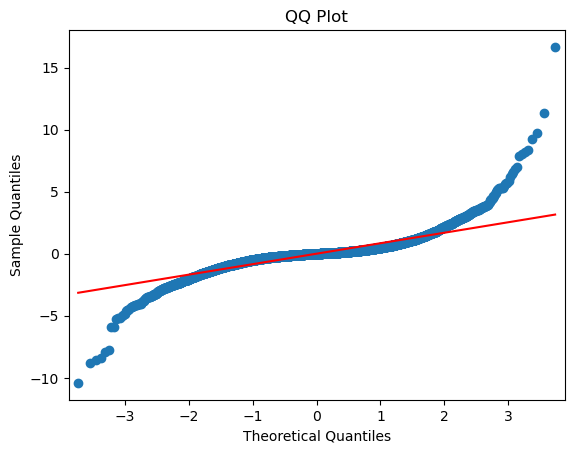

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 271426.8250603995, 'Chi^2 two-tail prob.': 0.0, 'Skew': 0.9728933343083913, 'Kurtosis': 27.5775510519218}


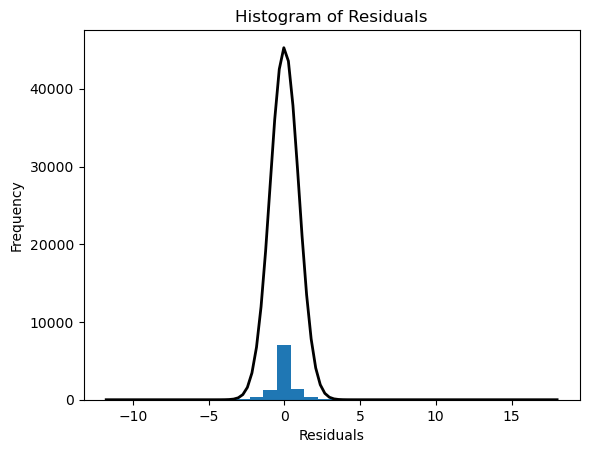

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 332.72256960153027, 'p-value': 9.163557591176803e-70, 'f-value': 68.63821709095545, 'f p-value': 7.202989610758629e-71}


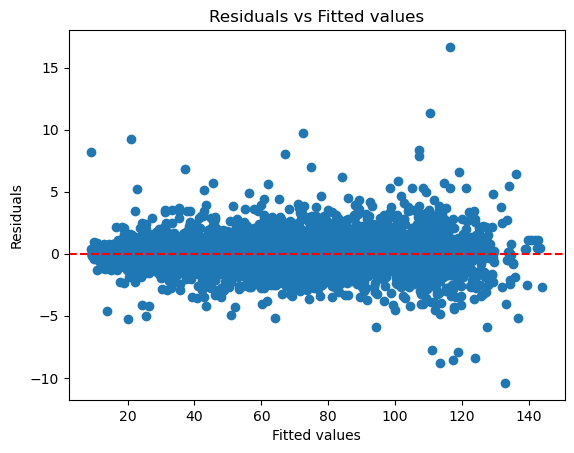

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 2.0107086673525516, 'p-value': 0.04435623800060018}


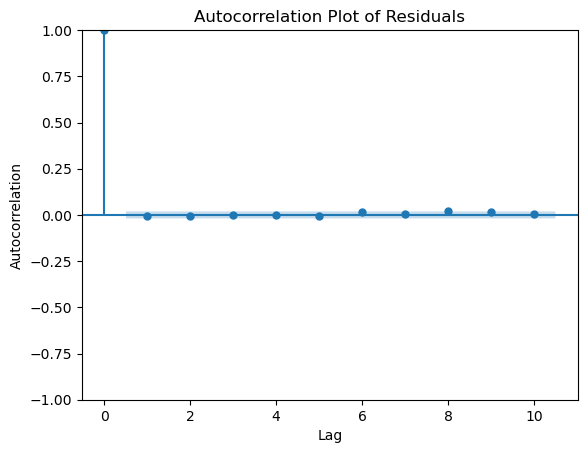

The residuals are autocorrelated.
The correlation matrix is:


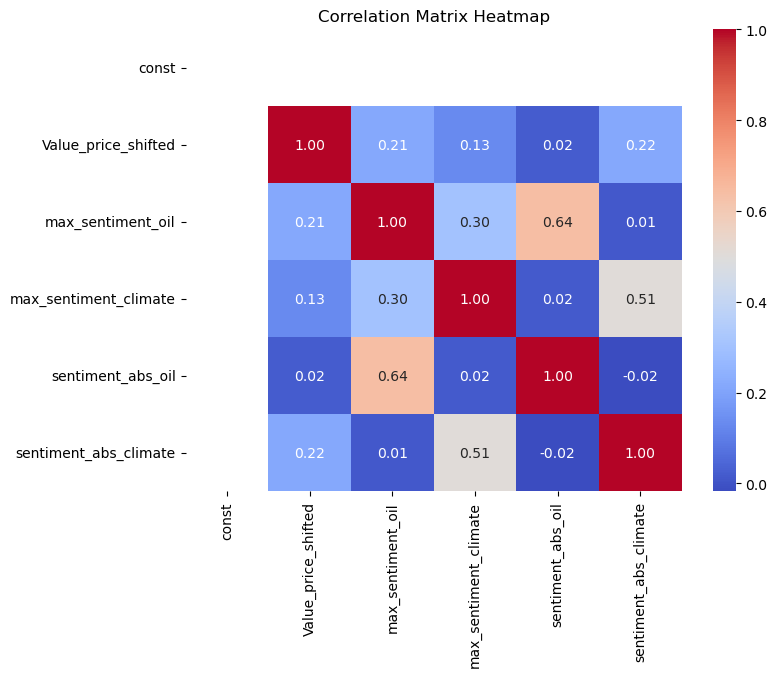

                Variable        VIF
0                  const  11.366181
1    Value_price_shifted   1.138559
2      max_sentiment_oil   2.231846
3  max_sentiment_climate   1.650299
4      sentiment_abs_oil   1.877040
5  sentiment_abs_climate   1.485593
There is multicollinearity in the model.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.624e+06
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:35:47   Log-Likelihood:                -14584.
No. Observations:               10717   AIC:                         2.918e+04
Df Residuals:                   10711   BIC:                         2.922e+04
Df Model:                           5                                      

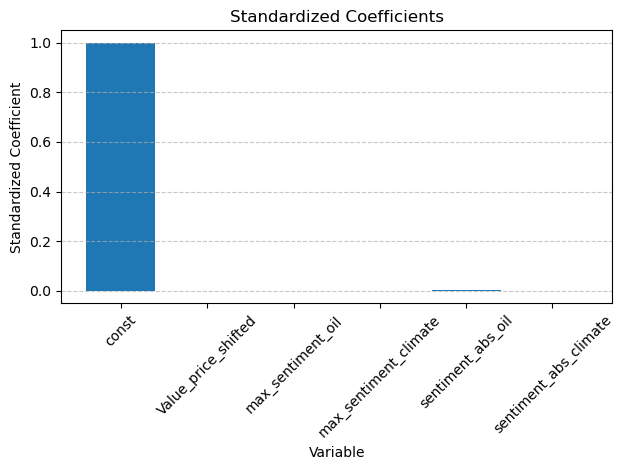

In [176]:
model = test_linear_model(X_train, y_train)

In [177]:
# plot the predictions
X_test_N = pd.DataFrame(X_test)
X_test_N = sm.add_constant(X_test_N)
y_pred = model.predict(X_test_N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


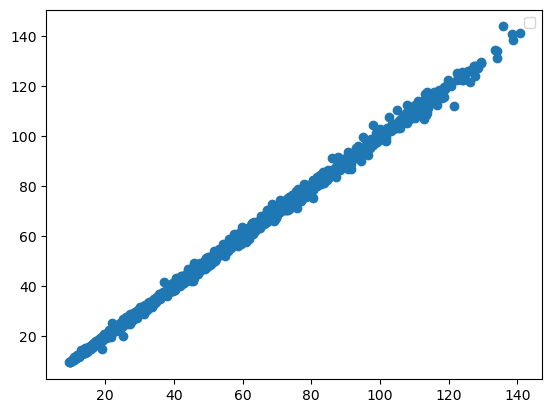

In [183]:
# plot the predictions
plt.scatter(y_test, y_pred)
plt.legend()

In [185]:
joined

,oil_sentence_count,word_count_oil,Sentiments_oil,max_sentiment_oil,sentiment_abs_oil,climate_sentence_count,word_count_climate,Sentiments_climate,sentiment_abs_climate,max_sentiment_climate,Value,Value_price_shifted
date,,,,,,,,,,,,
1987-05-20,1.770000,22.550000,-0.045720,0.185280,0.108280,2.000000,33.731618,0.105426,0.105426,0.160169,18.630000,18.450000
1987-05-21,1.780000,22.700000,-0.048080,0.185920,0.107920,2.000000,33.786765,0.104147,0.104147,0.157162,18.450000,18.550000
1987-05-22,1.790000,22.850000,-0.050440,0.186560,0.107560,2.000000,33.841912,0.102868,0.102868,0.154154,18.550000,18.566667
1987-05-23,1.800000,23.000000,-0.052800,0.187200,0.107200,2.000000,33.897059,0.101588,0.101588,0.151147,18.566667,18.583333
1987-05-24,1.810000,23.150000,-0.055160,0.187840,0.106840,2.000000,33.952206,0.100309,0.100309,0.148140,18.583333,18.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,1.647482,144.388489,0.079540,0.106410,0.079540,3.887097,46.852639,0.120692,0.120692,0.268242,81.040000,80.710000
2024-01-19,1.654676,143.992806,0.080212,0.107381,0.080212,4.032258,47.879765,0.120361,0.120361,0.269645,80.710000,81.040000
2024-01-20,1.661871,143.597122,0.080885,0.108353,0.080885,4.177419,48.906891,0.120029,0.120029,0.271048,81.040000,81.370000


The p-value for the F-test is: 0.0.
The model is statistically significant.


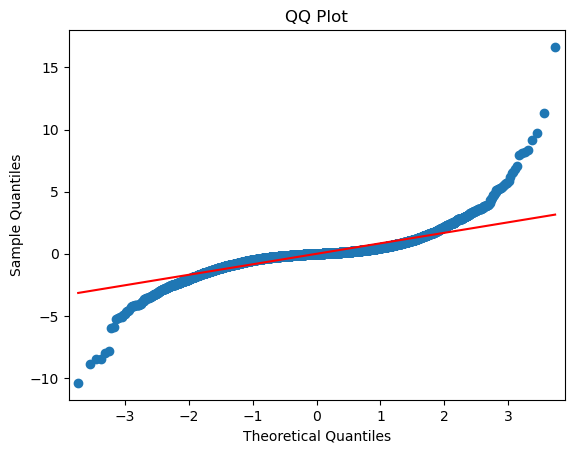

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 271062.84690508794, 'Chi^2 two-tail prob.': 0.0, 'Skew': 0.9842630291325135, 'Kurtosis': 27.55915108575176}


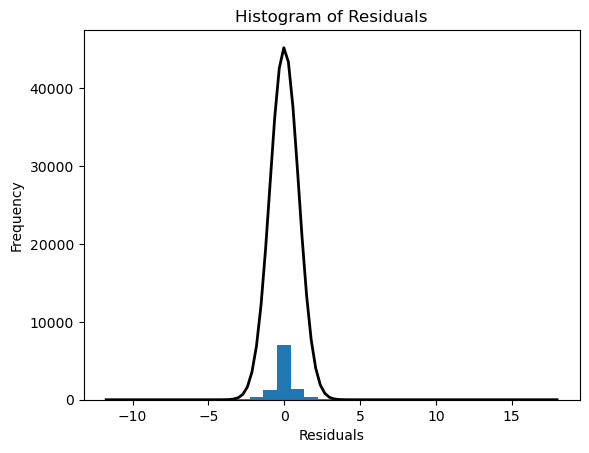

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 324.17899233529323, 'p-value': 1.780919830843573e-72, 'f-value': 334.22858916851374, 'f p-value': 1.5045290836221355e-73}


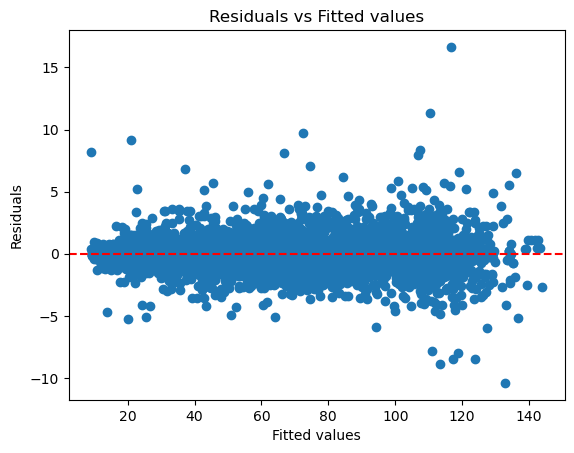

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 2.0116078214098088, 'p-value': 0.04426129427130698}


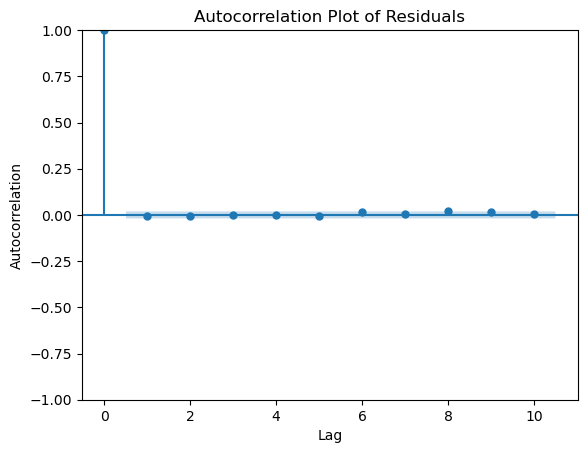

The residuals are autocorrelated.
The correlation matrix is:


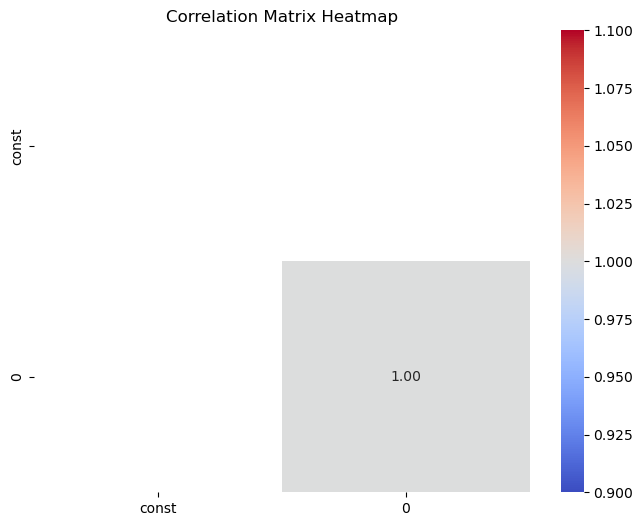

  Variable       VIF
0    const  3.265585
1        0  1.000000
There is no multicollinearity in the model.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.309e+07
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:39:17   Log-Likelihood:                -14596.
No. Observations:               10717   AIC:                         2.920e+04
Df Residuals:                   10715   BIC:                         2.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

TypeError: 'value' must be an instance of str or bytes, not a int

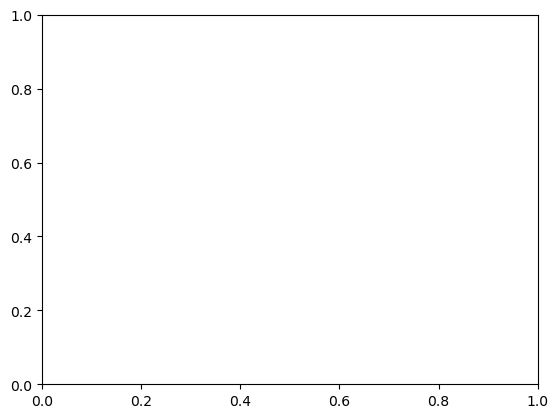

In [187]:
X_price = joined['Value_price_shifted'].values.reshape(-1, 1)
y_price = joined['Value'].values

X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

X_train_price = pd.DataFrame(X_train_price)
model = test_linear_model(X_train_price, y_train_price)

X_test_price_N = sm.add_constant(X_test_price)
y_pred_price = model.predict(X_test_price_N)

# plot the predictions
plt.scatter(y_test_price, y_pred_price)
plt.legend()

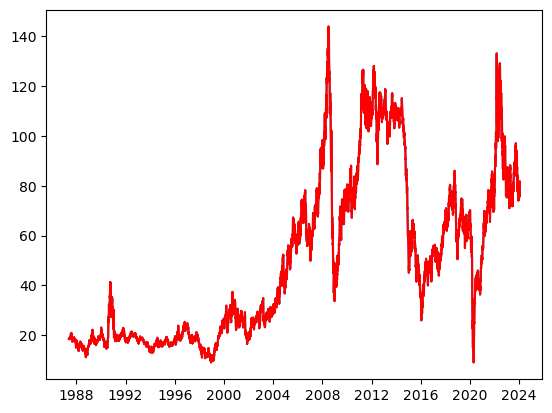

In [163]:
# evaluate the model
plt.plot(joined.index, y)
plt.plot(joined.index, y_pred, color='red')

In [104]:
# train neural network
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
model.fit(X,y)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

In [120]:
# assess the model
y_pred = model.predict(X)

mean_squared_error(y, y_pred)

0.9014927131138732

In [151]:
X_new = X.copy()
X_new['max_sentiment_oil'] = 1
# make previous day price shift randomly
X_new['Value_price_shifted'] = X_new['Value_price_shifted']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


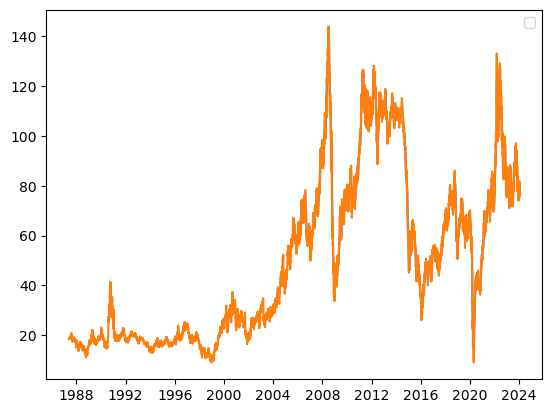

In [152]:
# predict oil price, but based solely on previous day data
y_pred = model.predict(X_new)

# take the latter half of Xnew
X_newu = X_new.iloc[len(X_new)//2:]

# predict oil price, but based solely on previous day data
y_pred = model.predict(X_newu)

# make y_pred smoother
y_pred = pd.Series(y_pred).rolling(window=10).mean()

plt.plot(X_newu.index, y_pred)

# also plot original oil price
plt.plot(joined.index, y)

# plt.plot(joined.index, y, label='true')
# plt.plot(joined.index, y_pred, label='predicted')
plt.legend()